<a href="https://colab.research.google.com/github/Jirtus-sanasam/MLP-Diabetes/blob/main/Diabetes6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initial import
import pandas as pd


In [ ]:
df = pd.read_csv("/content/diabetes_data2.csv")

In [ ]:
# Separate the independent and dependent variable

X = df.drop("Outcome", axis=1)
Y = df['Outcome']

In [ ]:
# Split the traning data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the MLP model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5174 - auc: 0.5699 - loss: 0.7449 - val_accuracy: 0.5260 - val_auc: 0.6764 - val_loss: 0.6821
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5520 - auc: 0.6101 - loss: 0.6976 - val_accuracy: 0.5844 - val_auc: 0.7056 - val_loss: 0.6560
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6041 - auc: 0.6402 - loss: 0.6698 - val_accuracy: 0.6818 - val_auc: 0.7275 - val_loss: 0.6384
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - auc: 0.6006 - loss: 0.6680 - val_accuracy: 0.7338 - val_auc: 0.7433 - val_loss: 0.6247
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6212 - auc: 0.5708 - loss: 0.6703 - val_accuracy: 0.7403 - val_auc: 0.7660 - val_loss: 0.6130
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - auc: 0.5902 - loss: 0.6656 - val_accuracy: 0.7532 - val_auc: 0.7766 - val_loss: 0.6018
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, Y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7532 - auc: 0.8027 - loss: 0.5019

Test Accuracy: 0.7727
Test AUC: 0.8208


In [ ]:
from sklearn.metrics import classification_report

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


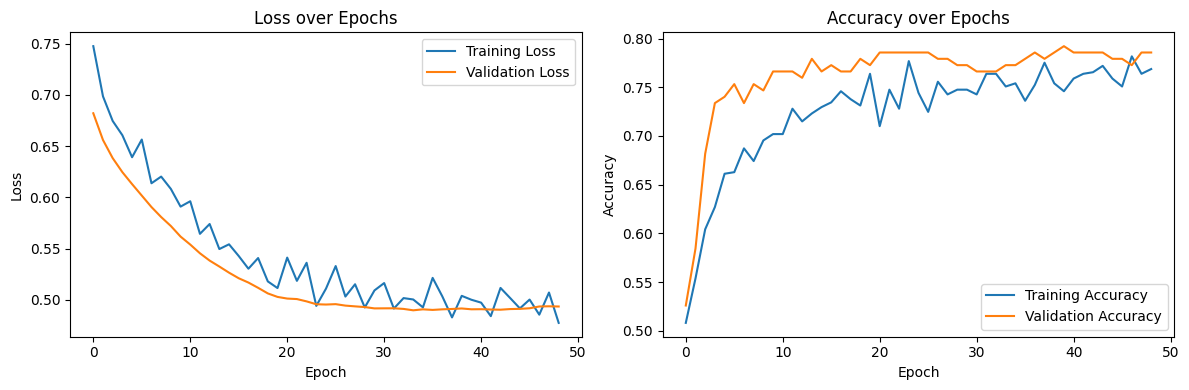

In [ ]:
# Optional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

Starting Genetic Algorithm for MLP Hyperparameter Tuning

Generation 1/8
  Individual 1: Fitness = 0.7806
  Individual 2: Fitness = 0.7765
  Individual 3: Fitness = 0.7621
  Individual 4: Fitness = 0.7825
  Individual 5: Fitness = 0.7986
  Individual 6: Fitness = 0.7780
  Individual 7: Fitness = 0.7797
  Individual 8: Fitness = 0.7894
  Individual 9: Fitness = 0.7795
  Individual 10: Fitness = 0.7588
  Individual 11: Fitness = 0.7843
  Individual 12: Fitness = 0.7732
  Individual 13: Fitness = 0.7652
  Individual 14: Fitness = 0.7829
  Individual 15: Fitness = 0.7988
  Best Fitness: 0.7988
  Avg Fitness: 0.7793

Generation 2/8
  Individual 1: Fitness = 0.7646
  Individual 2: Fitness = 0.6858
  Individual 3: Fitness = 0.7577
  Individual 4: Fitness = 0.7552
  Individual 5: Fitness = 0.7985
  Individual 6: Fitness = 0.7711
  Individual 7: Fitness = 0.7960
  Individual 8: Fitness = 0.7823
  Individual 9: Fitness = 0.7814
  Individual 10: Fitness = 0.7927
  Individual 11: Fitness = 0.8043


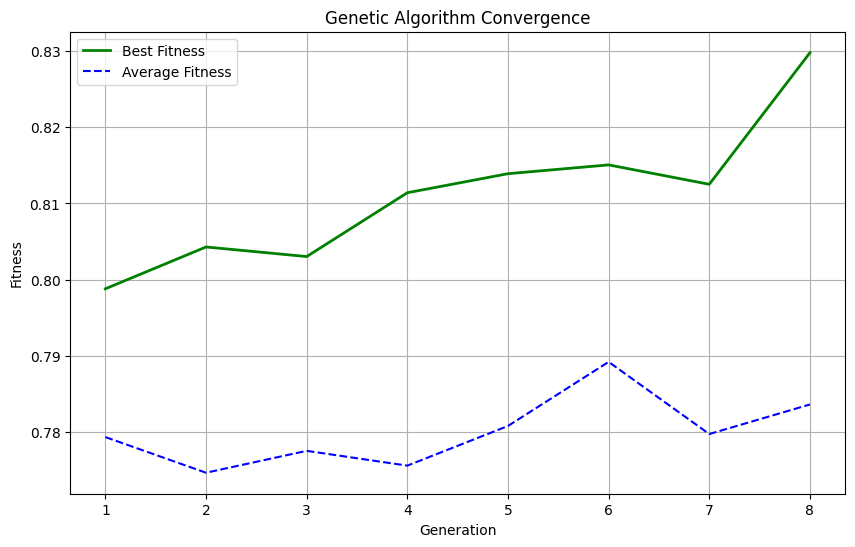

In [ ]:
# GA Optimization
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import random
from typing import Dict, List, Tuple

class GeneticAlgorithmMLPTuner:
    """Genetic Algorithm for tuning MLP hyperparameters"""

    def __init__(self, X_train, y_train, X_val, y_val,
                 population_size=20, generations=10, mutation_rate=0.2):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.input_dim = X_train.shape[1]

        # Define hyperparameter search space
        self.param_space = {
            'layer1_units': [8, 16, 32, 64, 128],
            'layer2_units': [4, 8, 16, 32, 64],
            'layer3_units': [0, 4, 8, 16, 32],  # 0 means no third hidden layer
            'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
            'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01],
            'batch_size': [16, 32, 64],
            'activation': ['relu', 'tanh', 'elu']
        }

        self.best_individual = None
        self.best_fitness = 0
        self.history = []

    def create_individual(self) -> Dict:
        """Create a random individual (set of hyperparameters)"""
        individual = {
            'layer1_units': random.choice(self.param_space['layer1_units']),
            'layer2_units': random.choice(self.param_space['layer2_units']),
            'layer3_units': random.choice(self.param_space['layer3_units']),
            'dropout_rate': random.choice(self.param_space['dropout_rate']),
            'learning_rate': random.choice(self.param_space['learning_rate']),
            'batch_size': random.choice(self.param_space['batch_size']),
            'activation': random.choice(self.param_space['activation'])
        }
        return individual

    def create_population(self) -> List[Dict]:
        """Create initial population"""
        return [self.create_individual() for _ in range(self.population_size)]

    def build_model(self, individual: Dict) -> keras.Model:
        """Build MLP model based on individual's hyperparameters"""
        model = keras.Sequential()

        # First hidden layer
        model.add(layers.Dense(
            individual['layer1_units'],
            activation=individual['activation'],
            input_shape=(self.input_dim,)
        ))
        model.add(layers.Dropout(individual['dropout_rate']))

        # Second hidden layer
        model.add(layers.Dense(
            individual['layer2_units'],
            activation=individual['activation']
        ))
        model.add(layers.Dropout(individual['dropout_rate']))

        # Optional third hidden layer
        if individual['layer3_units'] > 0:
            model.add(layers.Dense(
                individual['layer3_units'],
                activation=individual['activation']
            ))
            model.add(layers.Dropout(individual['dropout_rate']))

        # Output layer
        model.add(layers.Dense(1, activation='sigmoid'))

        # Compile model
        optimizer = keras.optimizers.Adam(learning_rate=individual['learning_rate'])
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
        )

        return model

    def evaluate_individual(self, individual: Dict) -> float:
        """Evaluate fitness of an individual (validation accuracy)"""
        try:
            # Build and train model
            model = self.build_model(individual)

            early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=0
            )

            model.fit(
                self.X_train, self.y_train,
                validation_data=(self.X_val, self.y_val),
                epochs=50,
                batch_size=individual['batch_size'],
                callbacks=[early_stop],
                verbose=0
            )

            # Evaluate on validation set
            _, accuracy, auc = model.evaluate(self.X_val, self.y_val, verbose=0)

            # Fitness is combination of accuracy and AUC
            fitness = 0.5 * accuracy + 0.5 * auc

            # Clear session to free memory
            keras.backend.clear_session()

            return fitness

        except Exception as e:
            print(f"Error evaluating individual: {e}")
            return 0.0

    def selection(self, population: List[Dict], fitness_scores: List[float]) -> List[Dict]:
        """Tournament selection"""
        selected = []
        tournament_size = 3

        for _ in range(len(population)):
            # Random tournament
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmax(tournament_fitness)]
            selected.append(population[winner_idx].copy())

        return selected

    def crossover(self, parent1: Dict, parent2: Dict) -> Tuple[Dict, Dict]:
        """Single-point crossover"""
        child1, child2 = parent1.copy(), parent2.copy()

        # Randomly select crossover point
        params = list(parent1.keys())
        crossover_point = random.randint(1, len(params) - 1)

        # Swap parameters after crossover point
        for param in params[crossover_point:]:
            child1[param], child2[param] = child2[param], child1[param]

        return child1, child2

    def mutate(self, individual: Dict) -> Dict:
        """Mutate individual by randomly changing one parameter"""
        mutated = individual.copy()

        if random.random() < self.mutation_rate:
            # Select random parameter to mutate
            param = random.choice(list(self.param_space.keys()))
            mutated[param] = random.choice(self.param_space[param])

        return mutated

    def evolve(self):
        """Run the genetic algorithm"""
        print("Starting Genetic Algorithm for MLP Hyperparameter Tuning")
        print("=" * 60)

        # Create initial population
        population = self.create_population()

        for generation in range(self.generations):
            print(f"\nGeneration {generation + 1}/{self.generations}")

            # Evaluate fitness for all individuals
            fitness_scores = []
            for i, individual in enumerate(population):
                fitness = self.evaluate_individual(individual)
                fitness_scores.append(fitness)
                print(f"  Individual {i+1}: Fitness = {fitness:.4f}")

            # Track best individual
            max_fitness_idx = np.argmax(fitness_scores)
            if fitness_scores[max_fitness_idx] > self.best_fitness:
                self.best_fitness = fitness_scores[max_fitness_idx]
                self.best_individual = population[max_fitness_idx].copy()

            # Store generation stats
            self.history.append({
                'generation': generation + 1,
                'best_fitness': max(fitness_scores),
                'avg_fitness': np.mean(fitness_scores),
                'worst_fitness': min(fitness_scores)
            })

            print(f"  Best Fitness: {max(fitness_scores):.4f}")
            print(f"  Avg Fitness: {np.mean(fitness_scores):.4f}")

            # Selection
            selected = self.selection(population, fitness_scores)

            # Crossover and mutation to create new population
            new_population = []
            for i in range(0, len(selected), 2):
                parent1 = selected[i]
                parent2 = selected[i + 1] if i + 1 < len(selected) else selected[0]

                # Crossover
                child1, child2 = self.crossover(parent1, parent2)

                # Mutation
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                new_population.extend([child1, child2])

            # Keep population size consistent
            population = new_population[:self.population_size]

            # Elitism: ensure best individual survives
            population[0] = self.best_individual.copy()

        print("\n" + "=" * 60)
        print("Genetic Algorithm Complete!")
        print(f"Best Fitness Achieved: {self.best_fitness:.4f}")
        print("\nBest Hyperparameters:")
        for param, value in self.best_individual.items():
            print(f"  {param}: {value}")

        return self.best_individual, self.best_fitness


# Example usage:
if __name__ == "__main__":
    # Assuming you have X_train, Y_train, X_test, Y_test already defined
    # Split test set into validation and test
    from sklearn.model_selection import train_test_split

    X_val, X_test_final, Y_val, Y_test_final = train_test_split(
        X_test, Y_test, test_size=0.5, random_state=42
    )

    # Initialize and run GA
    ga_tuner = GeneticAlgorithmMLPTuner(
        X_train, Y_train,
        X_val, Y_val,  # Use validation set
        population_size=15,
        generations=8,
        mutation_rate=0.2
    )

    best_params, best_fitness = ga_tuner.evolve()

    # Train final model with best hyperparameters
    print("\n" + "=" * 60)
    print("Training final model with best hyperparameters...")

    final_model = ga_tuner.build_model(best_params)

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    history = final_model.fit(
        X_train, Y_train,
        validation_data=(X_test_final, Y_test_final),
        epochs=100,
        batch_size=best_params['batch_size'],
        callbacks=[early_stop],
        verbose=1
    )

    # Final evaluation
    test_loss, test_accuracy, test_auc = final_model.evaluate(X_test_final, Y_test_final)
    print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
    print(f"Final Test AUC: {test_auc:.4f}")

    # Plot GA convergence
    import matplotlib.pyplot as plt

    generations = [h['generation'] for h in ga_tuner.history]
    best_fitness_history = [h['best_fitness'] for h in ga_tuner.history]
    avg_fitness_history = [h['avg_fitness'] for h in ga_tuner.history]

    plt.figure(figsize=(10, 6))
    plt.plot(generations, best_fitness_history, 'g-', label='Best Fitness', linewidth=2)
    plt.plot(generations, avg_fitness_history, 'b--', label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Genetic Algorithm Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
